# Projeto 3

## Objetivo
#### Prever se os projetos subidos por usuários do site serão escolhidos e finalizados pelos Design de acordo com a base de dados.
#### Features = Expected_hours e price
#### Classificação = unfinished

In [2]:
import pandas as pd

uri = "https://gist.githubusercontent.com/guilhermesilveira/1b7d5475863c15f484ac495bd70975cf/raw/16aff7a0aee67e7c100a2a48b676a2d2d142f646/projects.csv"
dados = pd.read_csv(uri)
dados.head()

,unfinished,expected_hours,price
0,1,26,192
1,1,88,9015
2,1,89,2577
3,1,42,275
4,1,39,170


In [3]:
## renomear as colunas para nomes em português
a_renomear = {
    'expected_hours' : 'horas_esperadas',
    'price' : 'preco',
    'unfinished' : 'nao_finalizado'
}
dados = dados.rename(columns = a_renomear)
dados.head()

,nao_finalizado,horas_esperadas,preco
0,1,26,192
1,1,88,9015
2,1,89,2577
3,1,42,275
4,1,39,170


In [4]:
## invertendo os valores da coluna nao_finalizado para evitar erros
troca = {
    0 : 1,
    1 : 0
}
dados['finalizado'] = dados.nao_finalizado.map(troca)
dados.head()

,nao_finalizado,horas_esperadas,preco,finalizado
0,1,26,192,0
1,1,88,9015,0
2,1,89,2577,0
3,1,42,275,0
4,1,39,170,0


In [5]:
import seaborn as sns
## observando o comportamento dos dados
sns.scatterplot(x="horas_esperadas", y="preco", data=dados)

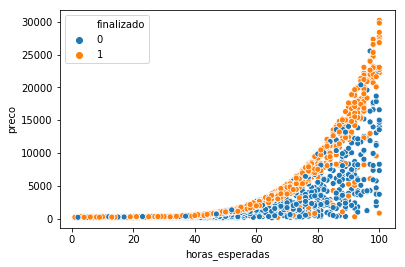

In [6]:
sns.scatterplot(x="horas_esperadas", y="preco",hue ='finalizado' ,data=dados)

In [7]:
## separando features e classificação
x =  dados[['horas_esperadas','preco']]
y =  dados['finalizado']

In [36]:
from sklearn.model_selection import train_test_split
from sklearn.svm import LinearSVC, SVC
from sklearn.metrics import accuracy_score
import numpy as np

SEED = 5
np.random.seed(SEED)
## fazendo a separação de dados (split)
train_x, test_x , train_y , test_y = train_test_split(x, y,
                                                      stratify = y,
                                                      test_size =0.25)

modelo = LinearSVC()
modelo.fit(train_x, train_y)
previsoes = modelo.predict(test_x)

print ('treinamos com %d elementos e testaremos com %d elementos' % (len(train_x),len(test_x)))
acuracia = accuracy_score(test_y, previsoes) * 100
print("A acurácia foi %.2f%%" % acuracia)

treinamos com 1617 elementos e testaremos com 540 elementos
A acurácia foi 56.48%


In [35]:

baseline = np.ones(540)
baseline
acuracia = accuracy_score(test_y, baseline) * 100
print("A acurácia da Baseline foi %.2f%%" % acuracia)

A acurácia da Baseline foi 52.59%


In [37]:
## Trocando o modelo de Linear para apenas SVC

SEED = 5
np.random.seed(SEED)
## fazendo a separação de dados (split)
train_x, test_x , train_y , test_y = train_test_split(x, y,
                                                      stratify = y,
                                                      test_size =0.25)

modelo =SVC()
modelo.fit(train_x, train_y)
previsoes = modelo.predict(test_x)

print ('treinamos com %d elementos e testaremos com %d elementos' % (len(train_x),len(test_x)))
acuracia = accuracy_score(test_y, previsoes) * 100
print("A acurácia foi %.2f%%" % acuracia)

treinamos com 1617 elementos e testaremos com 540 elementos
A acurácia foi 59.07%


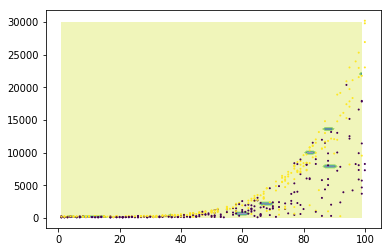

In [38]:
##  O que pode ter acontecido? Vamos descobrir qual tipo de relacionamento foi realizado pelo SVC.
##Plotaremos novamente, aproveitando a estrutura de código que já utilizamos para formação de pontos e assim por diante:

x_min = test_x.horas_esperadas.min()
x_max = test_x.horas_esperadas.max()
y_min = test_x.preco.min()
y_max = test_x.preco.max()

pixels = 100
eixo_x = np.arange(x_min, x_max, (x_max - x_min) / pixels)
eixo_y = np.arange(y_min, y_max, (y_max - y_min) / pixels)

xx, yy = np.meshgrid(eixo_x, eixo_y)
pontos = np.c_[xx.ravel(), yy.ravel()]

Z = modelo.predict(pontos)
Z = Z.reshape(xx.shape)

import matplotlib.pyplot as plt

plt.contourf(xx, yy, Z, alpha=0.3)
plt.scatter(test_x.horas_esperadas, test_x.preco, c=test_y, s=1)

# DECISION BOUNDARY

In [40]:
## mesmo trocando o modelo, continuamos com uma acurácia regular
## Escalas distintas em features causam um desbalanço em nosso algoritmo
## preco vai de 0 a 30000 e horas de 0 a 100, devemos padronizar nossos valores

from sklearn.preprocessing import StandardScaler



SEED = 5
np.random.seed(SEED)
raw_train_x, raw_test_x, train_y, test_y = train_test_split(x, y, test_size = 0.25,
                                                         stratify = y)
print("Treinaremos com %d elementos e testaremos com %d elementos" % (len(train_x), len(test_x)))

## raw_train_x e raw_test_x são as váriaveis com os valores originais, antes da padronização
scaler = StandardScaler()
scaler.fit(raw_train_x)
train_x = scaler.transform(raw_train_x)
test_x = scaler.transform(raw_test_x)

modelo = SVC()
modelo.fit(train_x, train_y)
previsoes = modelo.predict(test_x)

acuracia = accuracy_score(test_y, previsoes) * 100
print("A acurácia foi %.2f%%" % acuracia)

Treinaremos com 1617 elementos e testaremos com 540 elementos
A acurácia foi 66.85%


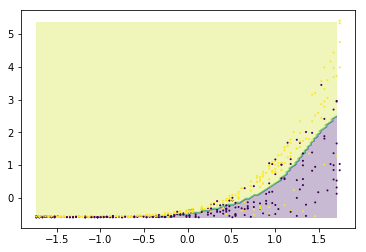

In [42]:
## Melhorou um pouco, mas o interessante é vizualizar

data_x = test_x[:,0]
data_y = test_x[:,1]

x_min = data_x.min()
x_max = data_x.max()
y_min = data_y.min()
y_max = data_y.max()

pixels = 100
eixo_x = np.arange(x_min, x_max, (x_max - x_min) / pixels)
eixo_y = np.arange(y_min, y_max, (y_max - y_min) / pixels)

xx, yy = np.meshgrid(eixo_x, eixo_y)
pontos = np.c_[xx.ravel(), yy.ravel()]

Z = modelo.predict(pontos)
Z = Z.reshape(xx.shape)

import matplotlib.pyplot as plt

plt.contourf(xx, yy, Z, alpha=0.3)
plt.scatter(data_x, data_y, c=test_y, s=1)

In [ ]:
## utilizar o SVC parece ser uma decisão melhor: 
## temos uma curva de decisão bem marcada e o estimador possui uma taxa de acerto um pouco maior, de 66.8